In [ ]:
# Data:Images
# 1.Download Manually the images from Google
# 2.Build a Image Web Crawler
# #.Use Python Libraries to scrape the images

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("rugby ball leather",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("ice cream cone",limit=30,output_dir='images',adult_filter_off=True)

In [ ]:
#Preprocessing
# 1.Resize
# 2.Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread 
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #Label Encoding the values
  path = os.path.join(DATADIR,category) #Create a path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)



In [ ]:
#Split Data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid = [
                 {'C':[1,10,100,1000],'kernel':['linear']},
                 {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2])

In [ ]:
y_test

array([1, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.7647058823529411

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 7,  0,  6],
       [ 0,  9,  0],
       [ 1,  1, 10]])

In [ ]:
# Save the model using Pickle Library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter URLhttps://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-deluxe-leather-rugby-ball-1_2356x.jpg?v=1551767452
(1766, 2356, 3)
PREDICTED OUTPUT: rugby ball leather


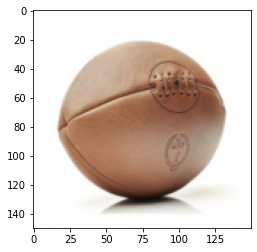

In [ ]:
# Testing a brand new Image
flat_data = []
url = input("Enter URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out  = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')